# Tukey depth eikonal equation in 2D Cartesian grids

In this notebook, we are interested to solve
$$ |\nabla u(x)| - \int_{(y-x) \cdot \nabla u(x) } \rho(y) dS(y) = 0, \quad  x \in \mathbb{R}^2$$
where $\rho$ is the given data density. The viscosity solution of the PDE $u$ will represent the Tukey depth measure of $\rho$. If $\rho$ is a probability measure, then $x$ such that $u(x) = 0.5$ will be the median of $\rho$.

In [2]:
import os
import numpy as np
import time
import tqdm
import matplotlib.pyplot as plt
from monotonescheme import Tukey2DSolver, interpolate

# make folder if not exists
save_fig_path = 'figures'
if not os.path.exists(save_fig_path):
    os.makedirs(save_fig_path)
save_data_path = 'data'
if not os.path.exists(save_data_path):
    os.makedirs(save_data_path)

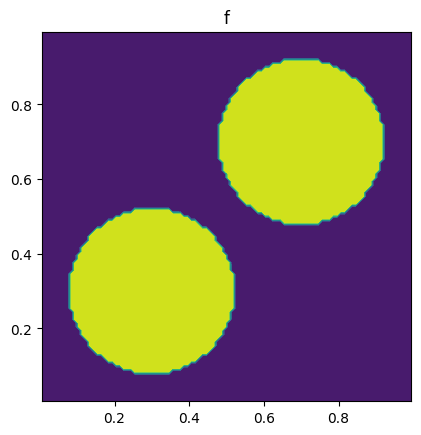

In [ ]:
# create an empty f
n = 100
f = np.zeros((n,n))
u = np.ones((n,n))

# initializing f
xx = np.linspace(0.5/n,1-0.5/n,n)
X,Y = np.meshgrid(xx,xx)

def f_ellipse():
    f = np.zeros((n,n))
    theta = -np.pi/3.0
    Xr = 0.5 + np.cos(theta)*(X-0.5) - np.sin(theta)*(Y-0.5)
    Yr = 0.5 + np.sin(theta)*(X-0.5) + np.cos(theta)*(Y-0.5)
    f[4*pow(Xr - 0.5,2) + pow(Yr-0.5,2) < 0.5 ** 2] = 1
    return f

# f = f_ellipse()
# f[(np.abs(X-0.5)<0.5) & (np.abs(Y-0.5)<0.5)] = 1
# f[(np.abs(X-0.5)<0.3) & (np.abs(Y-0.5)<0.3)] = 1
f[((X-0.3)**2 + (Y-0.3)**2 <0.22**2) | ((X-0.7)**2 + (Y-0.7)**2 <0.22**2)] = 1
# f[((X-0.25)**2 + (Y-0.25)**2 <0.2**2) | ((X-0.25)**2 + (Y-0.75)**2 <0.2**2) | ((X-0.75)**2 + (Y-0.25)**2 <0.2**2) | ((X-0.75)**2 + (Y-0.75)**2 <0.2**2)] = 1

# plotting f
fig = plt.figure()
ax = fig.add_subplot()
ax.contourf(X,Y,f)
ax.set_title("f")
ax.set_aspect('equal')
plt.show()

In [3]:
# make sure the data types are Float64.
u = u.astype(np.float64)
f = f.astype(np.float64)

In [6]:
# optimization parameters
max_iter = 50
tolerance= 1e-5

# initialize the HJ solver
stencil_size = 3
solver  = Tukey2DSolver(f, stencil_size)

# Running the iterations
start_time = time.time()
error_array = []
time_array = []

error = 1.0
for i in tqdm.tqdm(range(1,max_iter+1)):
    error = solver.iterate(u)
    error_array.append(error)
    time_array.append(time.time() - start_time)
    # print(f"i: {i} error: {error:0.2e} time: {time.time() - start_time:0.2e} sec")
    # if error is less than tolerance stop the iteration
    if error < tolerance or i == max_iter:
        print(f"Tolerance met! i: {i} error: {error:0.2e} time: {time.time() - start_time:0.2e} sec")
        break
    # save figures
    if i % 50 == 0:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(121)
        # ax.contourf(X,Y,u)
        ax.imshow(u, origin='lower')
        ax.axis('off')
        ax.set_aspect('equal')
        title_str = f"i: {i} error: {error:0.2e} time: {time.time() - start_time:0.2e} sec"
        plt.title(title_str)
        ax = fig.add_subplot(122)
        ax.plot(time_array, error_array,'o-')
        # plt.savefig(f"{save_fig_path}/fig-{i//10}.png")
        plt.show()
    # save dat
    if i % 50 == 0:
        np.save(f"{save_data_path}/data-{i//100}.npy",u)

Constructor finished. n:  100 stencil size:  3 number of stencils:  24 number of threads:  12


 98%|█████████▊| 49/50 [00:07<00:00,  6.70it/s]

Tolerance met! i: 50 error: 1.37e-03 time: 7.32e+00 sec


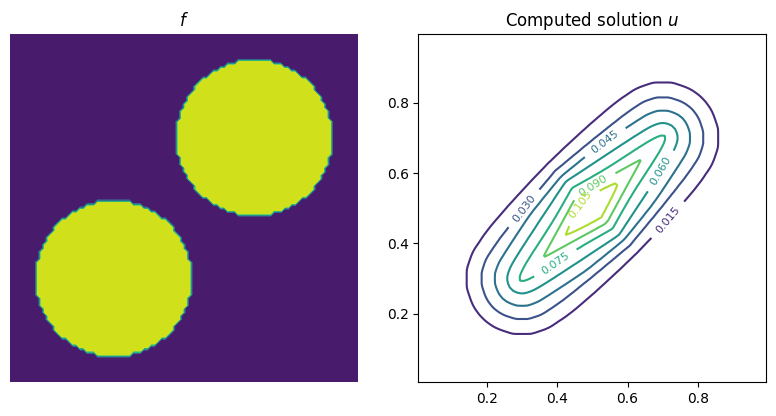

In [7]:
u1 = np.zeros((n,n))
u1[:] = u[:]
# plotting the result
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.contourf(X,Y,f)
ax.axis('off')
ax.set_title("$f$")
ax.set_aspect('equal')
ax = fig.add_subplot(122)
CS = ax.contour(X,Y,u,10)
ax.clabel(CS, inline=1, fontsize=8)
ax.set_title("Computed solution $u$")
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig(f"{save_fig_path}/tukey-2balls.eps")
plt.show()